# Stock Trading Strategies

In [26]:
# enviornment settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

## 1. Data Collecting

In [48]:
symbol='0700.HK'
# data=yf.download(symbol,end='2021-11-21',period='max',interval='1d')
#data 0700.HK.csv
data=pd.read_csv('0700.HK.csv')

prices.plot(title='tencent')

prices.to_csv(symbol+'.csv')

## 2. Data Preprocessing

In [49]:
data=pd.read_csv(symbol+'.csv')
data

,Unnamed: 0,Unnamed: 0.1,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2858,2016-01-04,151.399994,152.000000,148.699997,149.100006,146.776917,16047213
1,1,2859,2016-01-05,148.800003,150.500000,146.600006,147.399994,145.103394,16171969
2,2,2860,2016-01-06,145.699997,146.899994,145.100006,146.000000,143.725250,15614519
3,3,2861,2016-01-07,144.600006,146.000000,140.000000,140.199997,138.015579,0
4,4,2862,2016-01-08,140.800003,143.699997,140.800003,142.600006,140.378220,18564802
...,...,...,...,...,...,...,...,...,...
1447,1447,4305,2021-11-15,492.000000,494.799988,489.000000,491.799988,491.799988,19394604
1448,1448,4306,2021-11-16,497.399994,509.000000,494.200012,502.500000,502.500000,28263210
1449,1449,4307,2021-11-17,504.000000,509.000000,498.600006,509.000000,509.000000,21444520
1450,1450,4308,2021-11-18,502.000000,503.500000,492.799988,496.799988,496.799988,19321893


In [50]:
#drop date before 2016
data=data[data['Date']>'2016-01-01']
data

,Unnamed: 0,Unnamed: 0.1,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2858,2016-01-04,151.399994,152.000000,148.699997,149.100006,146.776917,16047213
1,1,2859,2016-01-05,148.800003,150.500000,146.600006,147.399994,145.103394,16171969
2,2,2860,2016-01-06,145.699997,146.899994,145.100006,146.000000,143.725250,15614519
3,3,2861,2016-01-07,144.600006,146.000000,140.000000,140.199997,138.015579,0
4,4,2862,2016-01-08,140.800003,143.699997,140.800003,142.600006,140.378220,18564802
...,...,...,...,...,...,...,...,...,...
1447,1447,4305,2021-11-15,492.000000,494.799988,489.000000,491.799988,491.799988,19394604
1448,1448,4306,2021-11-16,497.399994,509.000000,494.200012,502.500000,502.500000,28263210
1449,1449,4307,2021-11-17,504.000000,509.000000,498.600006,509.000000,509.000000,21444520
1450,1450,4308,2021-11-18,502.000000,503.500000,492.799988,496.799988,496.799988,19321893


In [51]:
data.to_csv(symbol+'.csv')

In [53]:
prices=data['Adj Close']

In [54]:
adjclose_px = data['Adj Close']
adjclose_px

0       146.776917
1       145.103394
2       143.725250
3       138.015579
4       140.378220
           ...    
1447    491.799988
1448    502.500000
1449    509.000000
1450    496.799988
1451    496.000000
Name: Adj Close, Length: 1452, dtype: float64

In [55]:
%%latex
The return on day $i$ is $R_i = \frac{P_i-P_{i-1}}{P_{i-1}}$ 

<IPython.core.display.Latex object>

In [56]:
# from IPython.display import Math
# Math(r'R_i = \frac{P_i-P_{i-1}}{P_{i-1}}')

<AxesSubplot:>

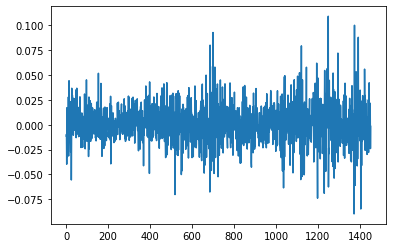

In [57]:
# change prices to returns
#Another method
# rets = adjclose_px / adjclose_px.shift(1)  - 1 
rets = adjclose_px.pct_change()
rets.plot()

<AxesSubplot:>

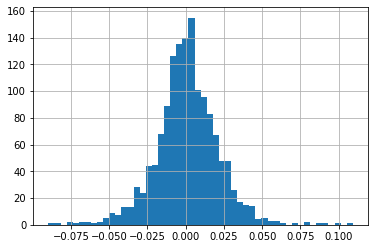

In [58]:
rets.hist(bins=50)
#正态分布说明市场是有效的
#右偏代表有潜在的获利空间

In [86]:
rets.describe()

count    1451.000000
mean        0.001049
std         0.020486
min        -0.089796
25%        -0.009977
50%         0.000796
75%         0.012620
max         0.109262
Name: Adj Close, dtype: float64

## 3. Trading Strategies

<p>
We will have 3 basic states/rules:<br>
1) Buy Signal – the short moving average is for the first time x points above the long tend.<br>
2) No position.<br>
3) Sell Signal – the short moving average is for the first time x points below the long trend.<br>
</p>

<AxesSubplot:>

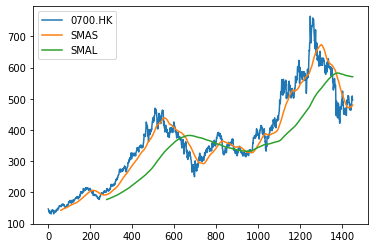

In [87]:
short = 60
long = 280#根据经验得出
mavgs = prices.rolling(short).mean()
mavgl = prices.rolling(long).mean()
data=pd.DataFrame({symbol:prices,'SMAS':mavgs,'SMAL':mavgl})
data.plot()

In [88]:
data.dropna(inplace=True)

In [89]:
data['Position']=np.where(data['SMAS']>data['SMAL'],1,-1)

In [90]:
data.tail()

,0700.HK,SMAS,SMAL,Position
1447,491.799988,475.385000,570.768800,-1
1448,502.500000,476.489999,570.764775,-1
1449,509.000000,477.953333,570.789307,-1
1450,496.799988,479.143332,570.761363,-1
1451,496.000000,480.179999,570.732343,-1


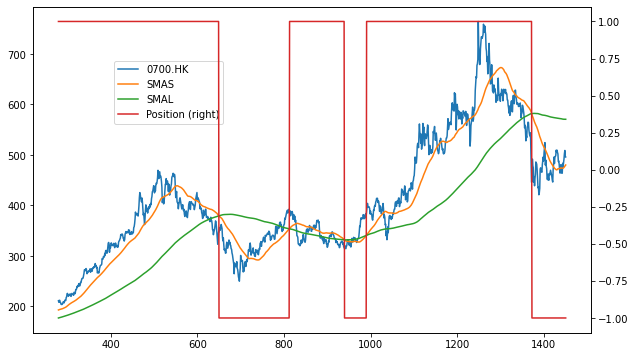

In [91]:
ax=data.plot(secondary_y='Position',figsize=(10,6))
ax.get_legend().set_bbox_to_anchor((0.35,0.85))


Showing that during the time period we have chosen to backtest, on 591 trading dates the 42d moving average lies more than 8 below the 84d moving average, and on 82 the 42d moving average lies more than 8 above the 84d moving average.


## 4. Performance of Trading Strategies

In [107]:
data['Returns']=np.log(data[symbol]/data[symbol].shift(1))

In [108]:
data['Strategy']=data['Position'].shift(1)*data['Returns']

KeyError: 'Position'

In [94]:
data.head().round(4)

,0700.HK,SMAS,SMAL,Position,Returns,Strategy
279,211.2975,193.1085,177.2456,1,NaN,NaN
280,208.3354,193.3586,177.4655,1,-0.0141,-0.0141
281,212.2849,193.6992,177.7054,1,0.0188,0.0188
282,212.0874,194.0712,177.9496,1,-0.0009,-0.0009
283,208.5329,194.3707,178.2014,1,-0.0169,-0.0169


In [79]:
data.dropna(inplace=True)

In [80]:
np.exp(data[['Returns','Strategy']].sum())

Returns     2.347401
Strategy    1.000827
dtype: float64

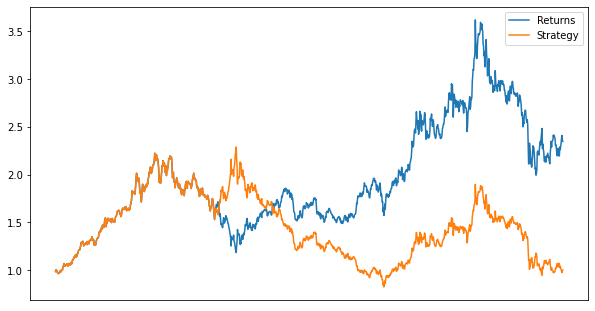

In [85]:
ax=data[['Returns','Strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

## 5. Optimization of Trading Strategies

#another strategy using bollinger bands

In [342]:
def bollinger_bands(prices,window=12):
    rolling_mean = prices.rolling(window).mean()
    rolling_std = prices.rolling(window).std()
    upper_band = rolling_mean + 2 *(rolling_std)
    lower_band = rolling_mean - 2 *(rolling_std)
    return rolling_mean,upper_band,lower_band

<AxesSubplot:>

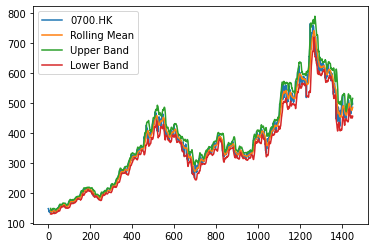

In [343]:
rolling_mean,upper_band,lower_band=bollinger_bands(prices,window=12)
data=pd.DataFrame({symbol:prices,'Rolling Mean':rolling_mean,'Upper Band':upper_band,'Lower Band':lower_band})
data.plot()

In [344]:
data.dropna(inplace=True)

In [345]:
#if the price is above the upper band, we sell, if below the lower band, we buy
data['Position']=np.where(data['0700.HK']>data['Upper Band'],-1,np.where(data['0700.HK']<data['Lower Band'],1,0))

In [346]:
data.tail()

,0700.HK,Rolling Mean,Upper Band,Lower Band,Position
1447,491.799988,474.816666,494.137844,455.495487,0
1448,502.500000,476.608332,501.589848,451.626817,-1
1449,509.000000,479.891665,510.562644,449.220687,0
1450,496.799988,482.624997,512.960351,452.289644,0
1451,496.000000,484.874997,514.803049,454.946946,0


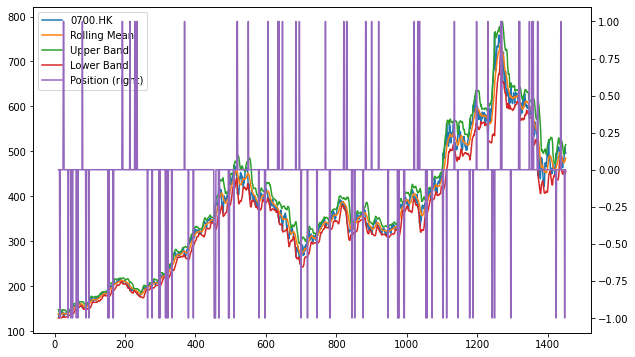

In [347]:
ax=data.plot(secondary_y='Position',figsize=(10,6))

In [348]:
data['Returns']=np.log(data[symbol]/data[symbol].shift(1))

In [349]:
data['Strategy']=data['Position'].shift(1)*data['Returns']

In [350]:
np.exp(data[['Returns','Strategy']].sum())

Returns     3.604079
Strategy    1.256469
dtype: float64

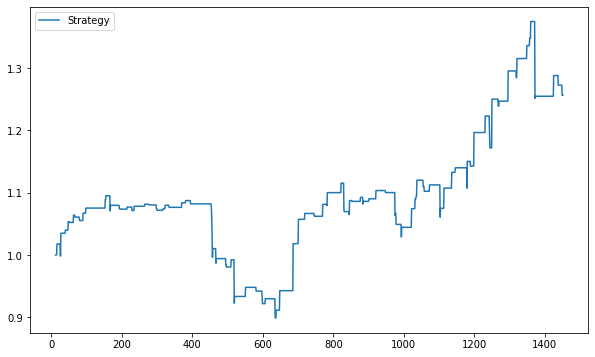

In [351]:
ax=data[['Strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))